In [ ]:
Stock_Price_Prediction

In [1]:
TESLA_STOCK_PATH="../../DATASETS/ML_Training/Stock_Price_Prediction/Tesla.csv"

In [2]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.labelsize']=18
matplotlib.rcParams['xtick.labelsize']=13
matplotlib.rcParams['ytick.labelsize']=13
matplotlib.rcParams['text.color']='#6A0DAD'
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error  #check error
from sklearn.metrics import r2_score  #check regression score

In [6]:
data=pd.read_csv(TESLA_STOCK_PATH)
data

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.000000,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.420000,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.920000,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.100000,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.000000,15.830000,16.110001,6866900,16.110001
...,...,...,...,...,...,...,...
1687,3/13/2017,244.820007,246.850006,242.779999,246.169998,3010700,246.169998
1688,3/14/2017,246.110001,258.119995,246.020004,258.000000,7575500,258.000000
1689,3/15/2017,257.000000,261.000000,254.270004,255.729996,4816600,255.729996
1690,3/16/2017,262.399994,265.750000,259.059998,262.049988,7100400,262.049988


In [8]:
data.shape

(1692, 7)

In [9]:
data.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [13]:
datacorr=data.corr()
datacorr['Open']

Open         1.000000
High         0.999623
Low          0.999605
Close        0.999233
Volume       0.407515
Adj Close    0.999233
Name: Open, dtype: float64

In [28]:
x=data.drop(['Open','Date'],axis=1)
y=data['Open']

In [29]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=20)

In [30]:
print(X_train.shape," ",X_test.shape," ",Y_train.shape," ",Y_test.shape)

(1353, 5)   (339, 5)   (1353,)   (339,)


In [31]:
model=LinearRegression()

In [33]:
model.fit(X_train,Y_train)

LinearRegression()

In [45]:
predictdval=model.predict(X_test)

In [46]:
print("Model Score:",round(r2_score(np.array(Y_test).reshape(-1,1),predictdval),2)*100,"%")

Model Score: 100.0 %


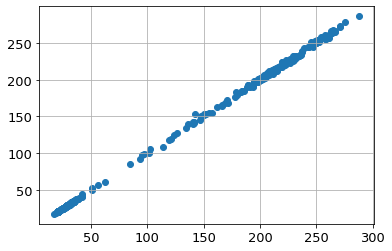

In [49]:
plt.scatter(Y_test,predictdval)
plt.grid()
plt.show()

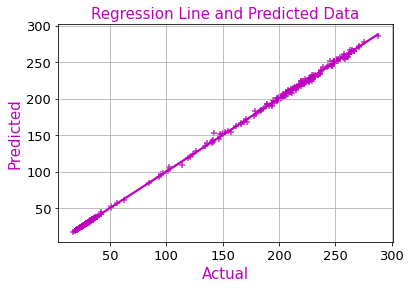

In [47]:
ax = sns.regplot(x=Y_test, y=predictdval, color="m",marker="+")
plt.title("Regression Line and Predicted Data",fontsize = 15,color="m")
plt.xlabel("Actual",fontsize=15,color="m")
plt.ylabel("Predicted",fontsize=15,color="m")
plt.grid()
plt.show()